In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import streamlit as st

In [184]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9d/9f/09fe6469e891031596872bd50bff90d47bea5c32d426235714cf24662740/streamlit-1.28.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/17/16/b12fca347ff9d062e3c44ad9641d2ec50364570a059f3078ada3a5119d7a/altair-5.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/fe/6b/7f177e8d6fe4caa14f4065433af9f879d4fab84f0d17dcba7b407f6bd

In [2]:
df = pd.read_csv("./data/daily_forex_rates.csv")

In [3]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [4]:
df.columns[0]

'currency'

In [5]:
df.isna().sum()

currency         0
base_currency    0
currency_name    0
exchange_rate    0
date             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320853 entries, 0 to 320852
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   currency       320853 non-null  object 
 1   base_currency  320853 non-null  object 
 2   currency_name  320853 non-null  object 
 3   exchange_rate  320853 non-null  float64
 4   date           320853 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.2+ MB


In [7]:
df["currency_name"].nunique() # 총 나라의 개수

168

In [8]:
df["currency_name"].unique()

array(['Zimbabwean Dollar', 'Ghanaian Cedi', 'Croatian Kuna',
       'Honduran Lempira', 'Hong Kong Dollar', 'Guyanaese Dollar',
       'Guatemalan Quetzal', 'Guinean Franc', 'Gambian Dalasi',
       'Gibraltar Pound', 'Guernsey Pound', 'Laotian Kip',
       'Georgian Lari', 'British Pound Sterling',
       'Falkland Islands Pound', 'Fijian Dollar', 'Euro',
       'Ethiopian Birr', 'Eritrean Nakfa', 'Egyptian Pound',
       'Haitian Gourde', 'Hungarian Forint', 'Indonesian Rupiah',
       'Israeli New Sheqel', 'Cayman Islands Dollar', 'Kuwaiti Dinar',
       'South Korean Won', 'North Korean Won', 'Comorian Franc',
       'Cambodian Riel', 'Kyrgystani Som', 'Kenyan Shilling',
       'Japanese Yen', 'Jordanian Dinar', 'Jamaican Dollar',
       'Jersey Pound', 'Icelandic Króna', 'Iranian Rial', 'Iraqi Dinar',
       'Indian Rupee', 'Manx pound', 'Algerian Dinar', 'Dominican Peso',
       'Danish Krone', 'Brazilian Real', 'Brunei Dollar',
       'Bermudan Dollar', 'Burundian Franc', 'Bahr

In [9]:
df.loc[df["currency_name"].str.contains("korea",case=False )]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
27,KPW,EUR,North Korean Won,979.857719,2023-11-22
250,KPW,EUR,North Korean Won,982.095220,2023-11-21
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [10]:
len(df["currency_name"].unique())

168

In [11]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [167]:
df.loc[df["currency_name"] == "South Korean Won"]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
592,KRW,EUR,South Korean Won,1414.257704,2023-11-19
712,KRW,EUR,South Korean Won,1415.184533,2023-11-18
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [13]:
df.loc[(df["date"].values >= "2022-11-05") & (df["date"].values <= "2023-11-11")]

,currency,base_currency,currency_name,exchange_rate,date
1859,AUD,EUR,Australian Dollar,1.684450,2023-11-10
1860,GHS,EUR,Ghanaian Cedi,12.793676,2023-11-10
1861,ARS,EUR,Argentine Peso,373.839740,2023-11-10
1862,ZWL,EUR,Zimbabwean Dollar,345.010367,2023-11-10
1863,CZK,EUR,Czech Republic Koruna,24.598096,2023-11-10
...,...,...,...,...,...
36251,MDL,EUR,Moldovan Leu,19.298000,2022-11-07
36252,BBD,EUR,Barbadian Dollar,1.928100,2022-11-06
36253,CZK,EUR,Czech Republic Koruna,24.378500,2022-11-06
36254,MXN,EUR,Mexican Peso,19.423500,2022-11-06


In [213]:
df2 = df.loc[(df["currency_name"] == "South Korean Won") & (df["date"].values >= "2022-01-01") & (df["date"].values <= "2022-02-01")]

In [214]:
df2 = df2.sort_values("date")

In [16]:
df.loc[(df["date"] == "2022-11-07") & (df["currency_name"].str.contains("korea",case=False)) ]

,currency,base_currency,currency_name,exchange_rate,date
36175,KRW,EUR,South Korean Won,1395.3,2022-11-07


In [215]:
df2.shape[0]

22

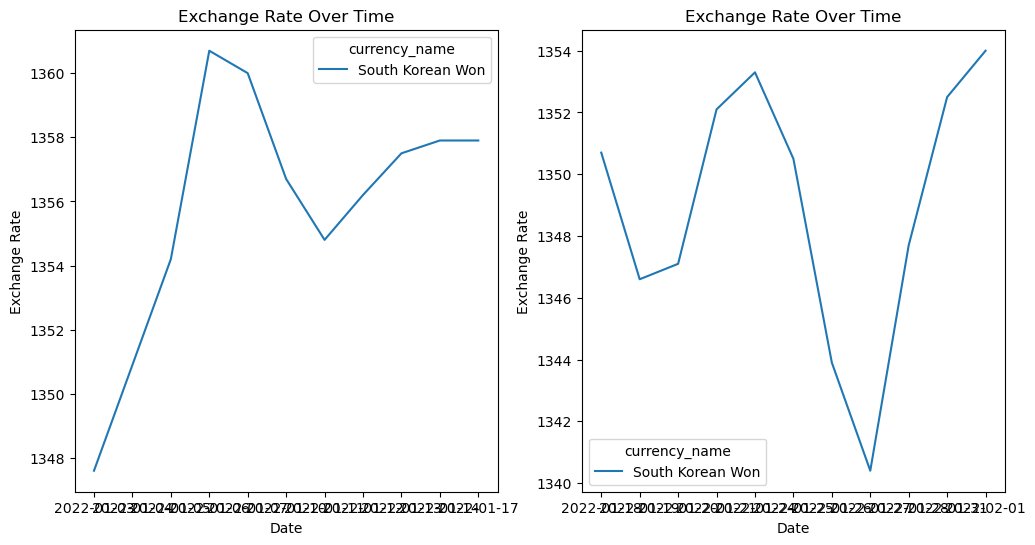

In [216]:
half_idx = len(df2) // 2
df2_part1 = df2.iloc[:half_idx, :]
df2_part2 = df2.iloc[half_idx:, :]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.lineplot(data=df2_part1, x='date', y='exchange_rate', hue="currency_name")
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

plt.subplot(1, 2, 2)
sb.lineplot(data=df2_part2, x='date', y='exchange_rate', hue="currency_name")
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

plt.show()

In [211]:
df2

,currency,base_currency,currency_name,exchange_rate,date
64063,KRW,EUR,South Korean Won,1347.6,2022-01-03
63852,KRW,EUR,South Korean Won,1350.9,2022-01-04
63778,KRW,EUR,South Korean Won,1354.2,2022-01-05
63633,KRW,EUR,South Korean Won,1360.7,2022-01-06
63505,KRW,EUR,South Korean Won,1360.0,2022-01-07
63368,KRW,EUR,South Korean Won,1356.7,2022-01-10
63294,KRW,EUR,South Korean Won,1354.8,2022-01-11
63082,KRW,EUR,South Korean Won,1356.2,2022-01-12
63053,KRW,EUR,South Korean Won,1357.5,2022-01-13
62814,KRW,EUR,South Korean Won,1357.9,2022-01-14


In [20]:
df["currency_name"].value_counts().index

Index(['Australian Dollar', 'Japanese Yen', 'Canadian Dollar', 'Swiss Franc',
       'British Pound Sterling', 'Hong Kong Dollar', 'New Zealand Dollar',
       'Chinese Yuan', 'Sierra Leonean Leone', 'Norwegian Krone',
       ...
       'CFP Franc', 'Latvian Lats', 'CFA Franc BCEAO', 'Gold (troy ounce)',
       'Silver (troy ounce)', 'Samoan Tala', 'United Arab Emirates Dirham',
       'Laotian Kip', 'Guernsey Pound', 'Kenyan Shilling'],
      dtype='object', name='currency_name', length=168)

In [19]:
df.loc[df["currency_name"].str.contains("ddsa", case=False)]

,currency,base_currency,currency_name,exchange_rate,date


In [27]:
df["currency_name"].value_counts().index

Index(['Australian Dollar', 'Japanese Yen', 'Canadian Dollar', 'Swiss Franc',
       'British Pound Sterling', 'Hong Kong Dollar', 'New Zealand Dollar',
       'Chinese Yuan', 'Sierra Leonean Leone', 'Norwegian Krone',
       ...
       'CFP Franc', 'Latvian Lats', 'CFA Franc BCEAO', 'Gold (troy ounce)',
       'Silver (troy ounce)', 'Samoan Tala', 'United Arab Emirates Dirham',
       'Laotian Kip', 'Guernsey Pound', 'Kenyan Shilling'],
      dtype='object', name='currency_name', length=168)

In [28]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [45]:
df3 = df.groupby("currency_name")[["exchange_rate","date"]].agg([np.min, np.max])

In [48]:
df3.columns[0]

('exchange_rate', 'amin')

In [56]:
df3

exchange_rate                      date            
                                   amin          amax        amin        amax
currency_name                                                                
Afghan Afghani                60.152000    139.708000  2014-11-24  2023-11-22
Albanian Lek                  97.700000    138.000000  2014-11-10  2023-11-22
Algerian Dinar               100.933000    164.190000  2014-11-24  2023-11-22
Angolan Kwanza               875.362859    915.951295  2023-10-28  2023-11-22
Argentine Peso                 9.216000    388.447717  2014-11-24  2023-11-22
...                                 ...           ...         ...         ...
Vietnamese Dong            22428.000000  28614.000000  2014-11-07  2023-11-22
Yemeni Rial                  225.590000    312.480000  2014-11-24  2023-11-22
Zambian Kwacha                23.195041     25.425753  2023-10-28  2023-11-22
Zambian Kwacha (pre-2013)   9506.214249   9847.124031  2023-10-28  2023-11-22
Zimbabwean Dollar            338.724800    403.505400  2014-11-24  2023-11-22

[168 rows x 4 columns]

In [64]:
df.loc[df["currency_name"] == "South Korean Won"]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
592,KRW,EUR,South Korean Won,1414.257704,2023-11-19
712,KRW,EUR,South Korean Won,1415.184533,2023-11-18
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [71]:
df.loc[df["currency_name"] == "South Korean Won"].min().values[3:][0]

1157.80005

In [84]:
df.loc[df["currency_name"] == "South Korean Won"].max().values[3:][1]

'2023-11-22'

In [82]:
df.loc[df["currency_name"] == "South Korean Won"].max()

currency                      KRW
base_currency                 EUR
currency_name    South Korean Won
exchange_rate              1476.1
date                   2023-11-22
dtype: object

In [85]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [99]:
df["currency_name"].str.split()

0         [Zimbabwean, Dollar]
1             [Ghanaian, Cedi]
2             [Croatian, Kuna]
3          [Honduran, Lempira]
4         [Hong, Kong, Dollar]
                  ...         
320848    [Australian, Dollar]
320849    [Australian, Dollar]
320850         [Japanese, Yen]
320851      [Canadian, Dollar]
320852    [Australian, Dollar]
Name: currency_name, Length: 320853, dtype: object

In [150]:
def split_cname(currency_name) :
    cname = currency_name.split()
    country = " ".join(cname[:-1])
    return  country , cname[-1]

In [156]:
df["currency_name"].apply(split_cname).values[74][0] 

'Chilean Unit of Account'

In [154]:
df["currency_name"].apply(split_cname).values[74][1]

'(UF)'

In [112]:
df.loc[df["currency_name"].str.split().str.len() >= 5]

,currency,base_currency,currency_name,exchange_rate,date
74,CLF,EUR,Chilean Unit of Account (UF),0.034387,2023-11-22
98,STD,EUR,São Tomé and Príncipe Dobra,22533.319848,2023-11-22
204,CLF,EUR,Chilean Unit of Account (UF),0.034400,2023-11-21
306,STD,EUR,São Tomé and Príncipe Dobra,22584.947979,2023-11-21
415,CLF,EUR,Chilean Unit of Account (UF),0.034824,2023-11-20
...,...,...,...,...,...
300081,CLF,EUR,Chilean Unit of Account (UF),0.030360,2014-11-28
300122,CLF,EUR,Chilean Unit of Account (UF),0.030060,2014-11-27
300241,CLF,EUR,Chilean Unit of Account (UF),0.030050,2014-11-26
300424,CLF,EUR,Chilean Unit of Account (UF),0.029970,2014-11-25


In [158]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [ ]:
#plt.hist(data= , x= , rwidth= , bins = )
#-> data = 차트화 시킬 데이터 프레임
#-> x = 차트화 시킬 컬럼명
#-> rwidth = 데이터들의 거리 비율(작을수록 커짐)
#-> bins = 빈 개수 어떻게 할건지

In [179]:
df2

,currency,base_currency,currency_name,exchange_rate,date
36175,KRW,EUR,South Korean Won,1395.300000,2022-11-07
36096,KRW,EUR,South Korean Won,1384.100000,2022-11-08
35998,KRW,EUR,South Korean Won,1371.900000,2022-11-09
35812,KRW,EUR,South Korean Won,1377.000000,2022-11-10
35713,KRW,EUR,South Korean Won,1359.500000,2022-11-11
...,...,...,...,...,...
2557,KRW,EUR,South Korean Won,1393.187791,2023-11-06
2457,KRW,EUR,South Korean Won,1394.915779,2023-11-07
2357,KRW,EUR,South Korean Won,1401.103095,2023-11-08
2104,KRW,EUR,South Korean Won,1401.570746,2023-11-09


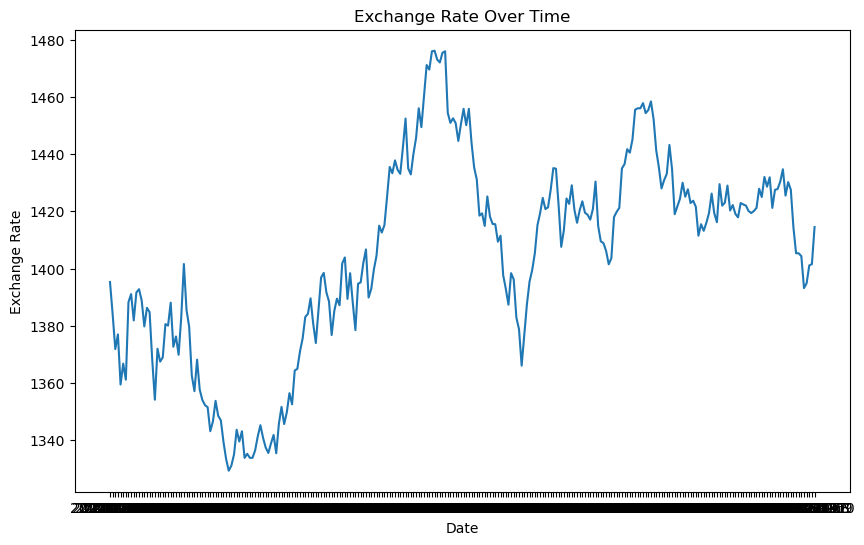

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(df2['date'], df2['exchange_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

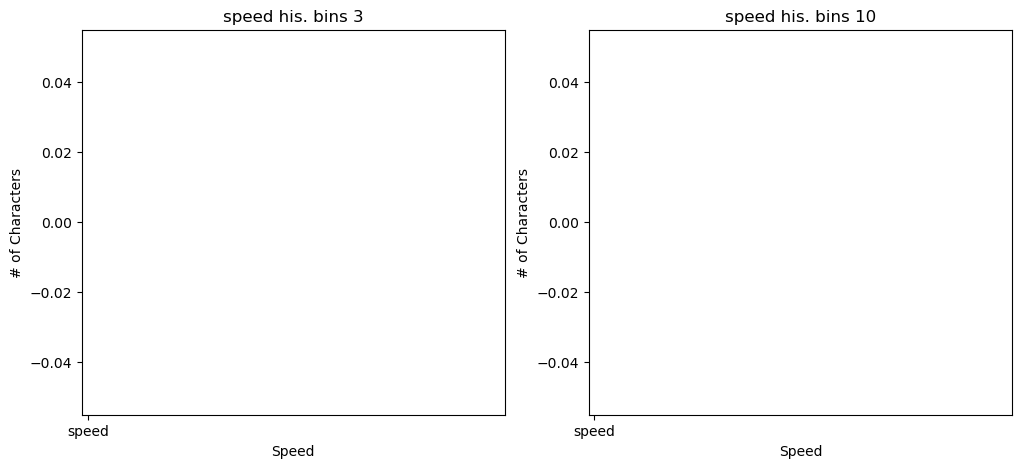

In [202]:
plt.figure( figsize= (12, 5) )

plt.subplot(1, 2, 1)

plt.title("speed his. bins 3")
plt.xlabel("Speed")
plt.ylabel("# of Characters")

my_bins = np.arange(5,163,3)
plt.hist(data=df, x="speed", rwidth=0.8, bins=my_bins)

plt.subplot(1, 2, 2)

plt.title("speed his. bins 10")
plt.xlabel("Speed")
plt.ylabel("# of Characters")

my_bins = np.arange(5, 170, 10)
plt.hist(data=df, x="speed", rwidth=0.8, bins=my_bins)
plt.show()

In [188]:
df2

,currency,base_currency,currency_name,exchange_rate,date
36175,KRW,EUR,South Korean Won,1395.300000,2022-11-07
36096,KRW,EUR,South Korean Won,1384.100000,2022-11-08
35998,KRW,EUR,South Korean Won,1371.900000,2022-11-09
35812,KRW,EUR,South Korean Won,1377.000000,2022-11-10
35713,KRW,EUR,South Korean Won,1359.500000,2022-11-11
...,...,...,...,...,...
2557,KRW,EUR,South Korean Won,1393.187791,2023-11-06
2457,KRW,EUR,South Korean Won,1394.915779,2023-11-07
2357,KRW,EUR,South Korean Won,1401.103095,2023-11-08
2104,KRW,EUR,South Korean Won,1401.570746,2023-11-09
